In [1]:
library(statnet)
library(stats)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.1.2"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
ndtv           "0.13.0"  "0.13.1" "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.2"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el_dist = read.csv("../data/common/dist.csv", stringsAsFactors = FALSE)
el_dist$log_dist = log(el_dist$dist)
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist")
set.edge.value(dist_net, "dist", el_dist$dist)
set.edge.value(dist_net, "log_dist", el_dist$log_dist)
dist_net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 30276 
    missing edges= 0 
    non-missing edges= 30276 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [3]:
el_diplomatic = read.csv("../data/2011/features/dip_exhange_clean.csv", stringsAsFactors = FALSE)
diplomatic_exchange_net = network(el_diplomatic, directed = TRUE, matrix.type = "edgelist")
diplomatic_exchange_net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 7850 
    missing edges= 0 
    non-missing edges= 7850 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [4]:
el_colony = read.csv("../data/common/colonization_el.csv", stringsAsFactors = FALSE)
colony_net = network(el_colony, directed = TRUE, matrix.type = "edgelist")
set.edge.value(colony_net, "colonization", el_colony$colonization)
colony_net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 30276 
    missing edges= 0 
    non-missing edges= 30276 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [5]:
el = read.csv("../data/2011/edgelist_disparity.csv", stringsAsFactors = FALSE)
nl = read.csv("../data/2011/nodelist.csv", stringsAsFactors = FALSE)

In [6]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)
nl$area <- log(nl$area)
nl$population <- log(nl$population)
nl$gdp_per_capita <- log(nl$gdp_per_capita)

In [7]:
nl$gdp_us_dollar = as.numeric(scale(nl$gdp_us_dollar))
nl$gdp_growth = as.numeric(scale(nl$gdp_growth))
nl$inflation_rate = as.numeric(scale(nl$inflation_rate))
nl$population = as.numeric(scale(nl$population))
nl$gdp_per_capita = as.numeric(scale(nl$gdp_per_capita))
nl$agriculture_forestry_fishing_of_gdp = as.numeric(scale(nl$agriculture_forestry_fishing_of_gdp))
nl$industry_of_gdp = as.numeric(scale(nl$industry_of_gdp))
nl$merchandise_of_gdp = as.numeric(scale(nl$merchandise_of_gdp))
nl$net_barter_of_trade = as.numeric(scale(nl$net_barter_of_trade))
nl$foreign_direct_investment_inflows = as.numeric(scale(nl$foreign_direct_investment_inflows))

In [8]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')
set.edge.value(net, "trade", el$weight)
net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 3595 
    missing edges= 0 
    non-missing edges= 3595 

 Vertex attribute names: 
    agriculture_forestry_fishing_of_gdp area continent country_iso3 foreign_direct_investment_inflows gdp_growth gdp_per_capita gdp_us_dollar industry_of_gdp inflation_rate landlocked langoff_1 merchandise_of_gdp net_barter_of_trade population vertex.names 

 Edge attribute names not shown 

In [11]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        triangles + 
                        nodecov("gdp_us_dollar") + # world bank
                        absdiff("gdp_us_dollar") + # world bank
                        nodecov("inflation_rate") + # world bank
                        absdiff("inflation_rate") + # world bank
                        nodecov("gdp_growth") + # world bank
                        absdiff("gdp_growth") + # world bank
                        nodematch("landlocked") + # http://www.cepii.fr/CEPII/en/bdd_modele/download.asp?id=6
                        nodematch("langoff_1") + # http://www.cepii.fr/CEPII/en/bdd_modele/download.asp?id=6
                        edgecov(diplomatic_exchange_net) + # https://pardee.du.edu/diplomatic-representation-data-set
                        nodecov("agriculture_forestry_fishing_of_gdp") + # world bank
                        absdiff("agriculture_forestry_fishing_of_gdp") + # world bank
                        nodecov("industry_of_gdp") + # world bank
                        absdiff("industry_of_gdp") + # world bank
                        nodecov("merchandise_of_gdp") + # world bank
                        absdiff("merchandise_of_gdp") + # world bank
                        nodecov("net_barter_of_trade") + # world bank
                        absdiff("net_barter_of_trade") + # world bank
                        nodecov("foreign_direct_investment_inflows") + # world bank
                        absdiff("foreign_direct_investment_inflows") + # world bank
                        edgecov(colony_net, "colonization") +
                        edgecov(dist_net, "log_dist")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.255317733370375.

The log-likelihood improved by 1.673.

Iteration 2 of at most 20:

Optimizing with step length 0.358291091613671.

The log-likelihood improved by 1.747.

Iteration 3 of at most 20:

Optimizing with step length 0.647573393202081.

The log-likelihood improved by 2.24.

Iteration 4 of at most 20:

Optimizing with step length 0.727912619740102.

The log-likelihood improved by 1.927.

Iteration 5 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 2.252.

Step length converged once. Increasing MCMC sample size.

Iteration 6 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 1.701.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-l

In [12]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + triangles + nodecov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar") + nodecov("inflation_rate") + absdiff("inflation_rate") + 
    nodecov("gdp_growth") + absdiff("gdp_growth") + nodematch("landlocked") + 
    nodematch("langoff_1") + edgecov(diplomatic_exchange_net) + 
    nodecov("agriculture_forestry_fishing_of_gdp") + absdiff("agriculture_forestry_fishing_of_gdp") + 
    nodecov("industry_of_gdp") + absdiff("industry_of_gdp") + 
    nodecov("merchandise_of_gdp") + absdiff("merchandise_of_gdp") + 
    nodecov("net_barter_of_trade") + absdiff("net_barter_of_trade") + 
    nodecov("foreign_direct_investment_inflows") + absdiff("foreign_direct_investment_inflows") + 
    edgecov(colony_net, "colonization") + edgecov(dist_net, "log_dist"))

Iterations:  6 out of 20 

Monte Carlo MLE Results:
                                             Estimate Std. Error MCMC % z value
edges                                       -4.240906   0.293631      0 -

In [11]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [12]:
gof


Goodness-of-fit for model statistics 

                                                   obs         min        mean
edges                                        3594.0000  3392.00000  3625.93000
mutual                                        324.0000   273.00000   332.32000
triangle                                    13788.0000 11246.00000 14339.68000
nodecov.gdp_us_dollar                        -569.9575  -809.26069  -569.01332
absdiff.gdp_us_dollar                        4588.6487  4308.38056  4621.67146
nodecov.inflation_rate                       -149.1085  -357.32896  -133.64867
absdiff.inflation_rate                       3086.4781  2839.96269  3123.46776
nodecov.gdp_growth                            245.1728    63.16186   245.75031
absdiff.gdp_growth                           2456.0285  2273.89795  2477.36914
nodematch.continent                           524.0000   466.00000   528.70000
nodematch.landlocked                         2208.0000  2062.00000  2222.67000
nodematch.la

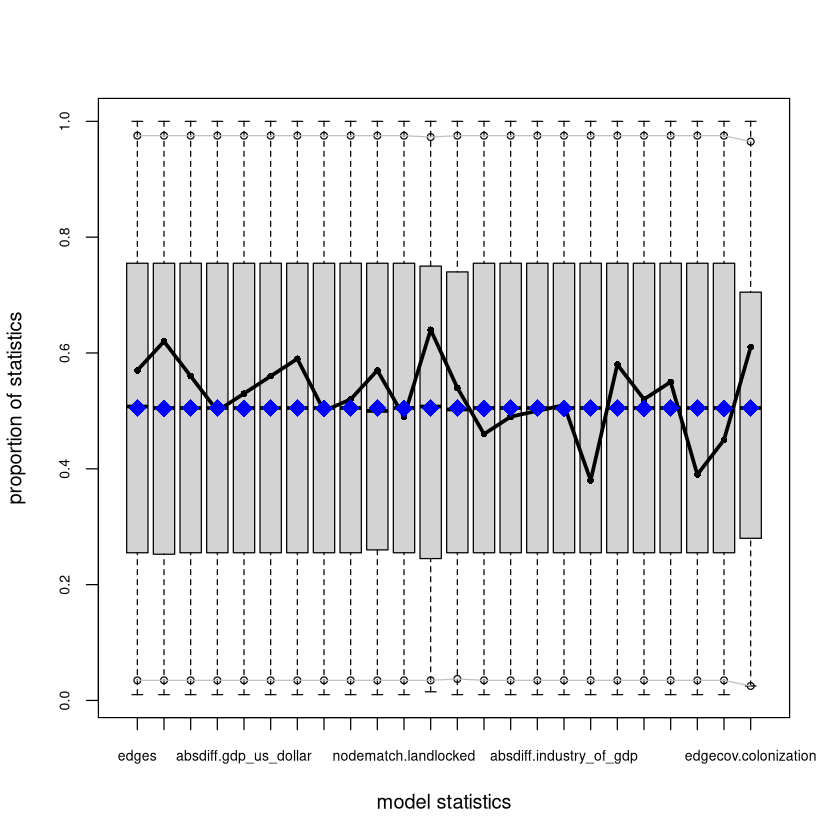

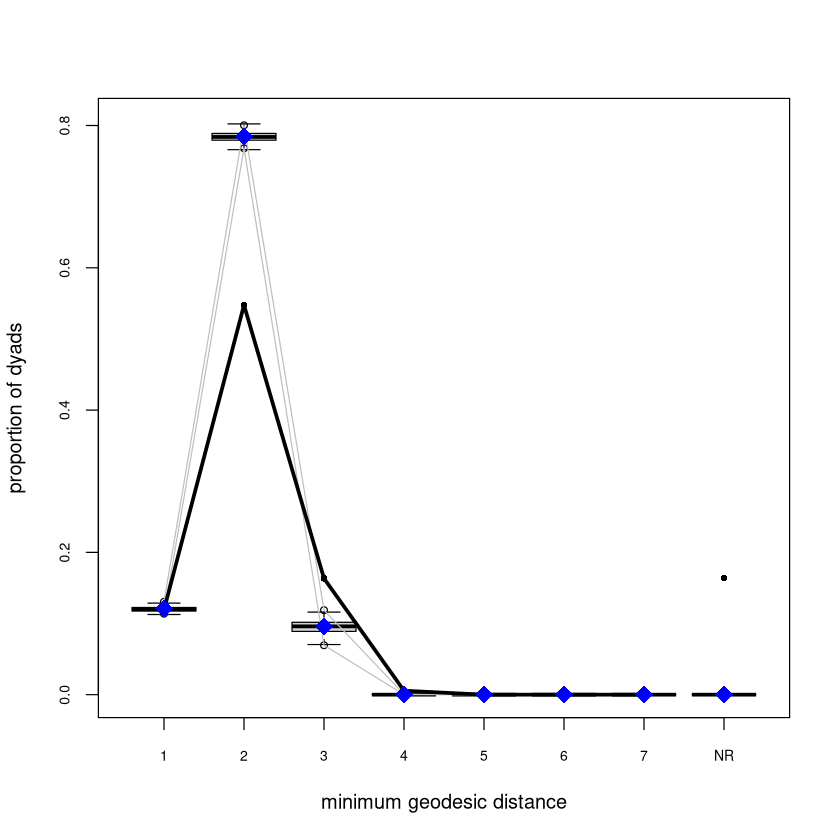

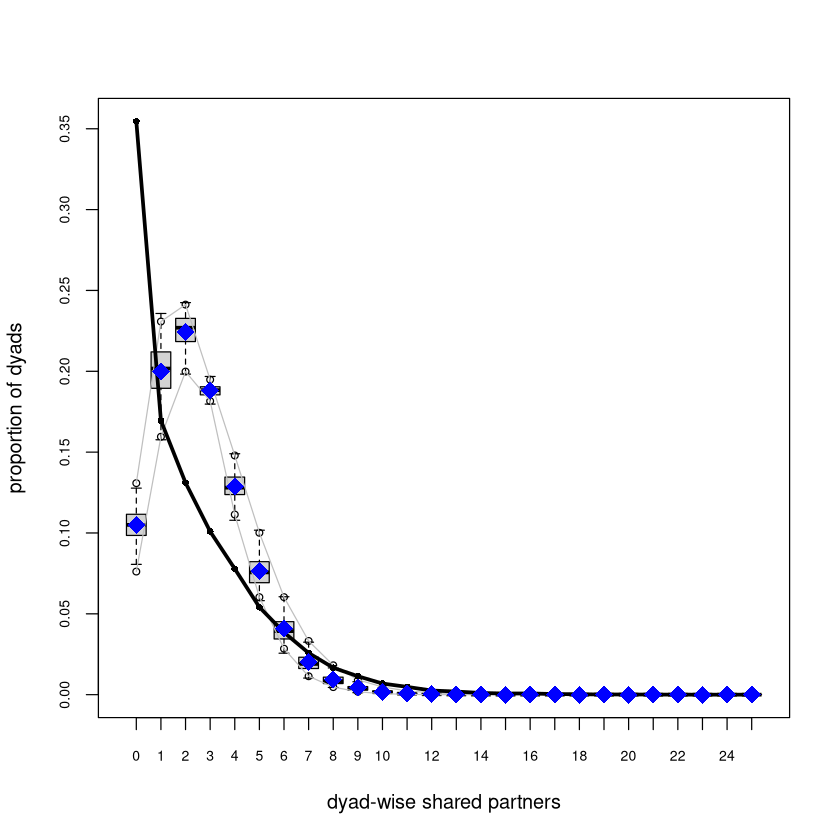

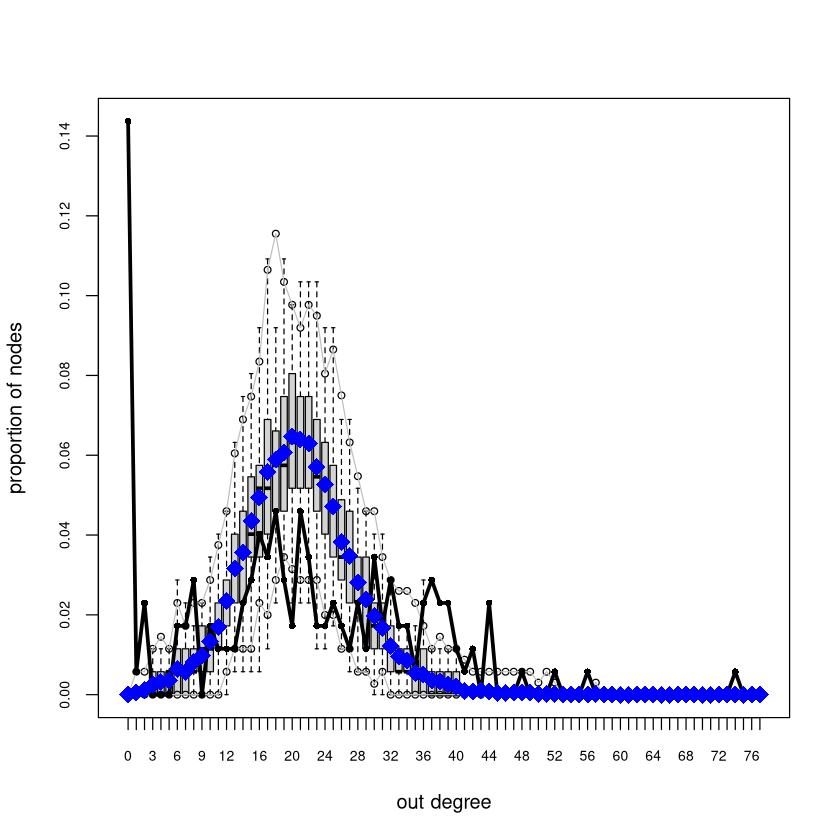

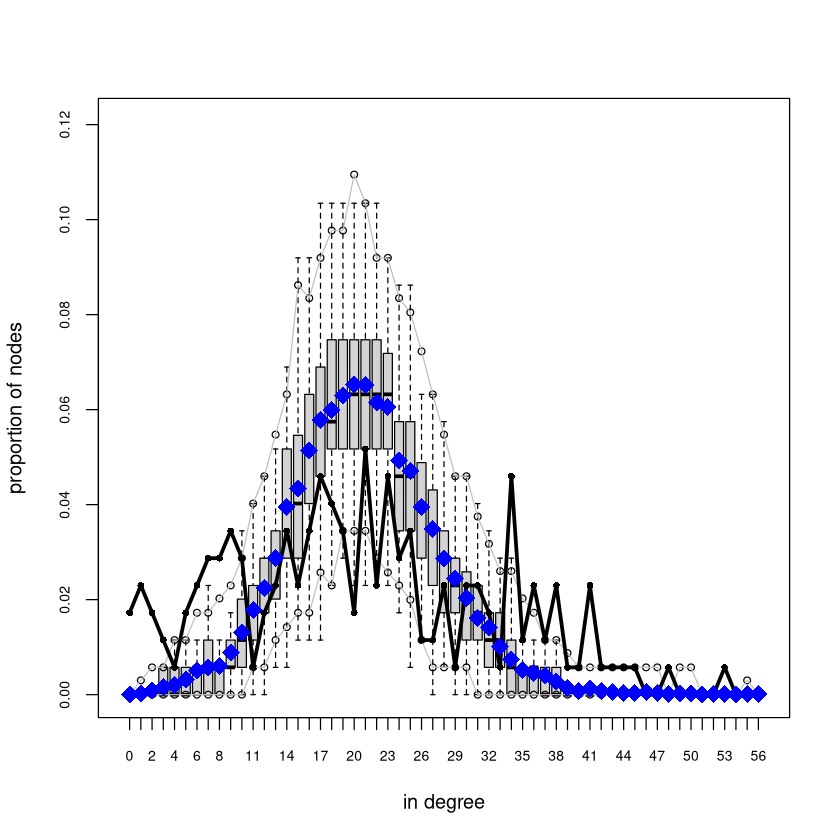

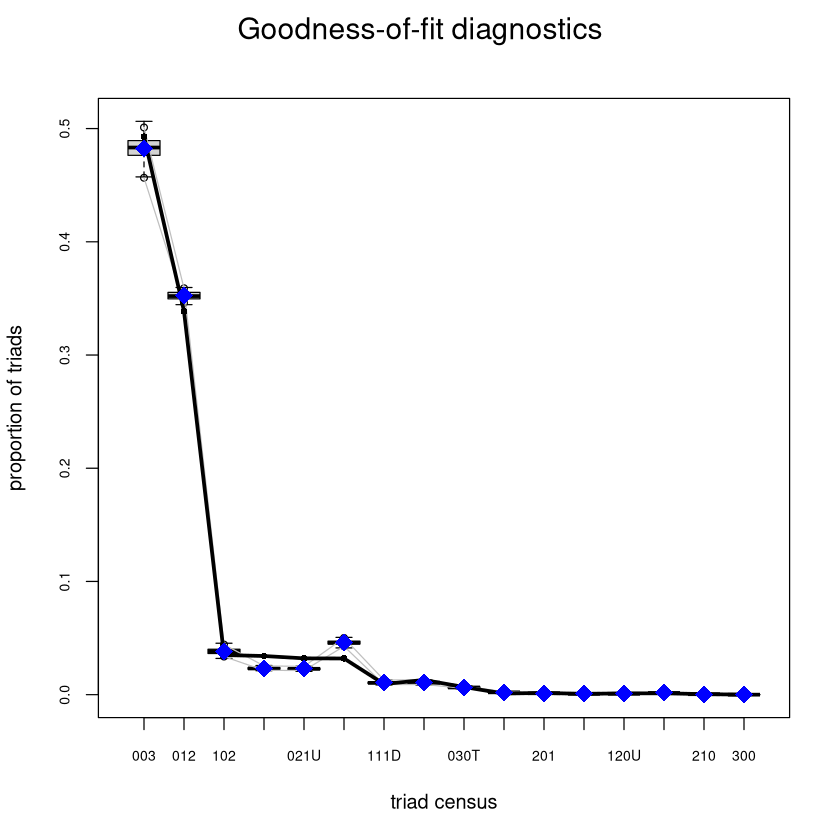

In [13]:
plot(gof)

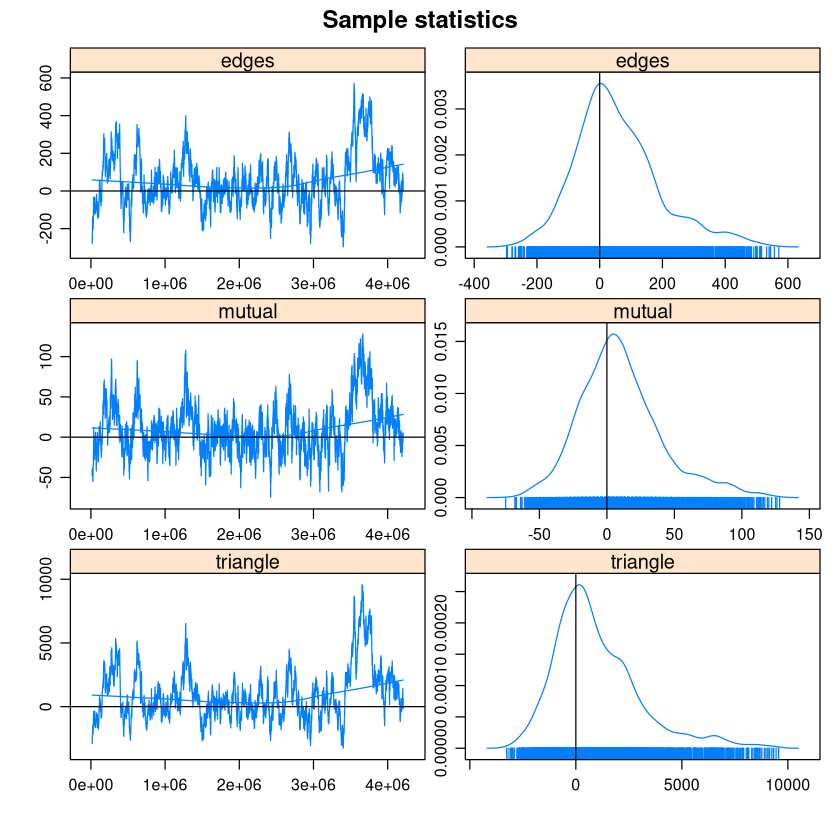

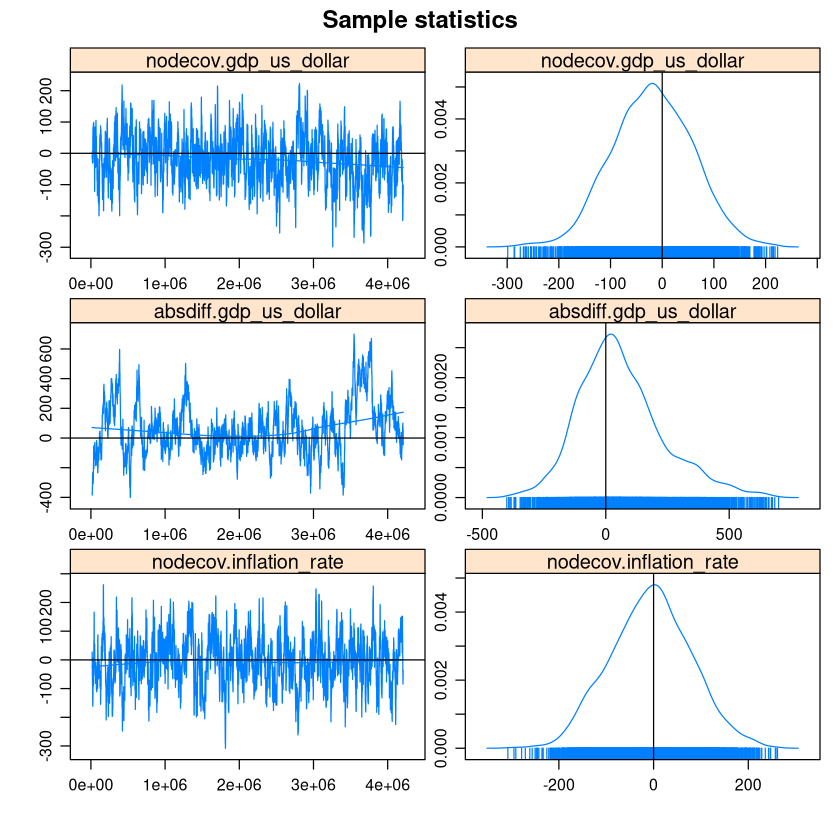

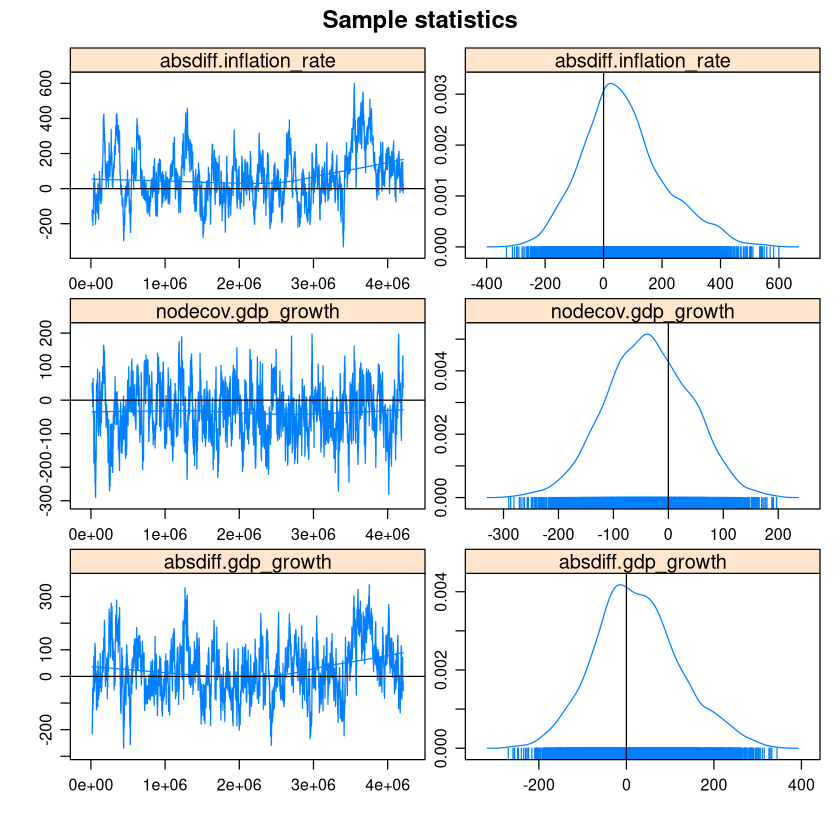

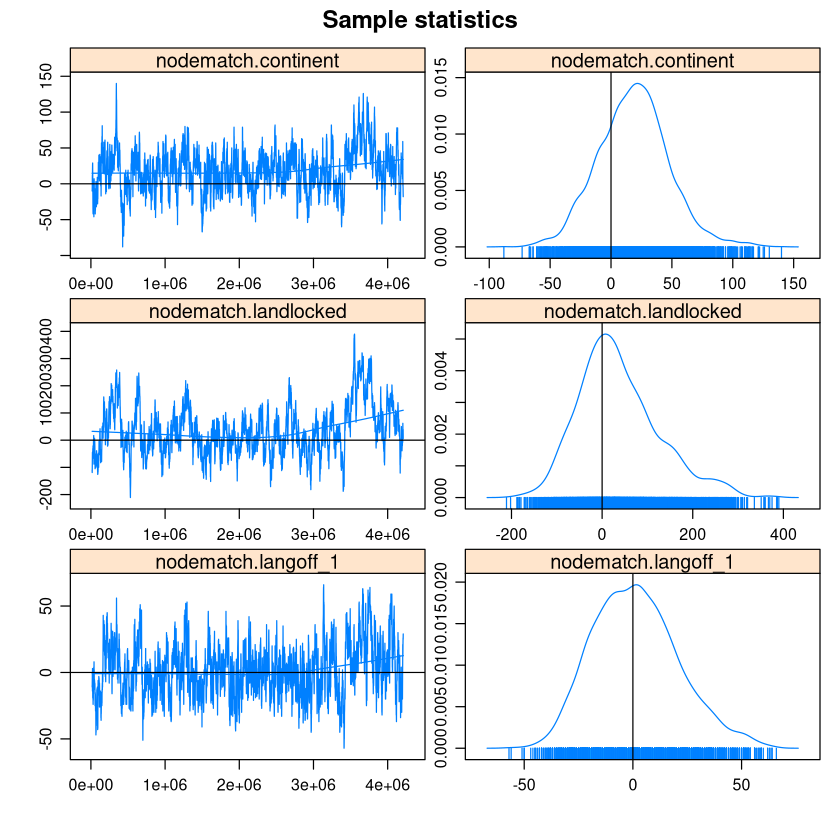

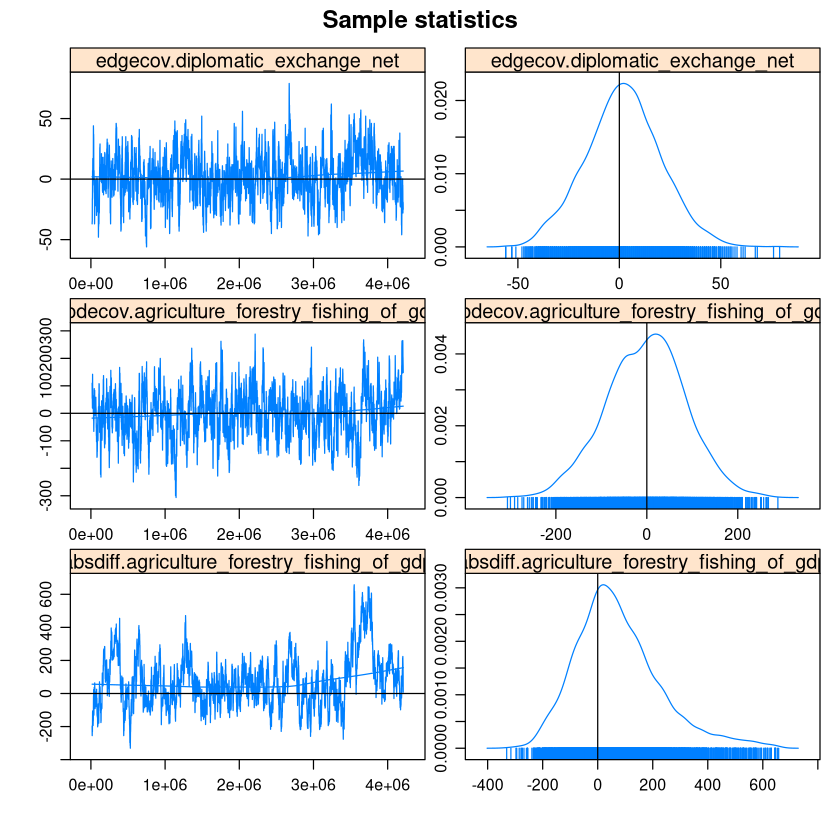

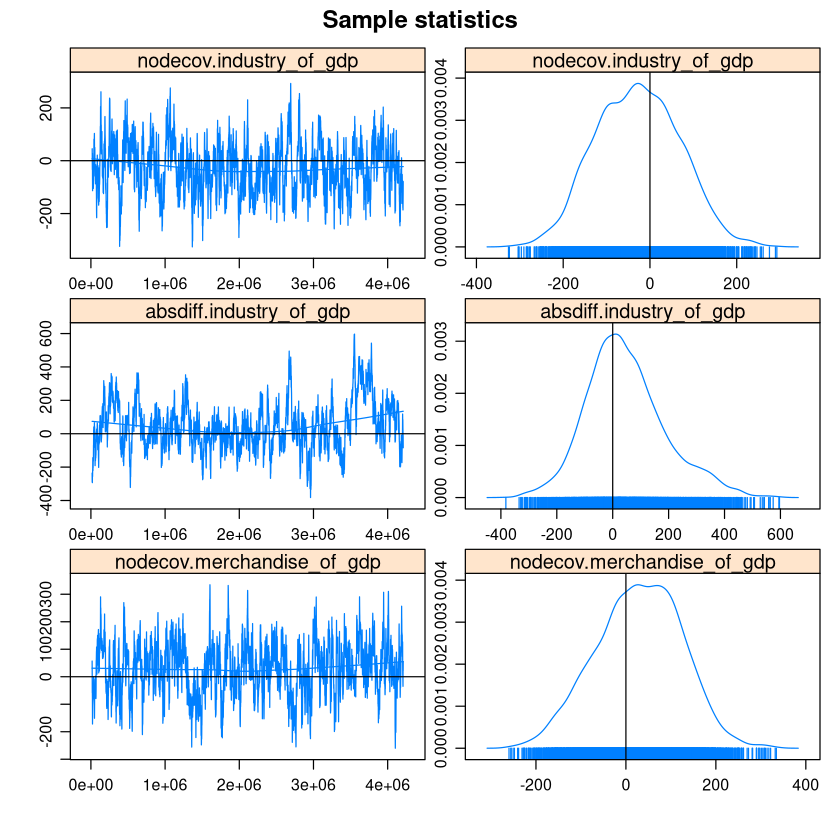

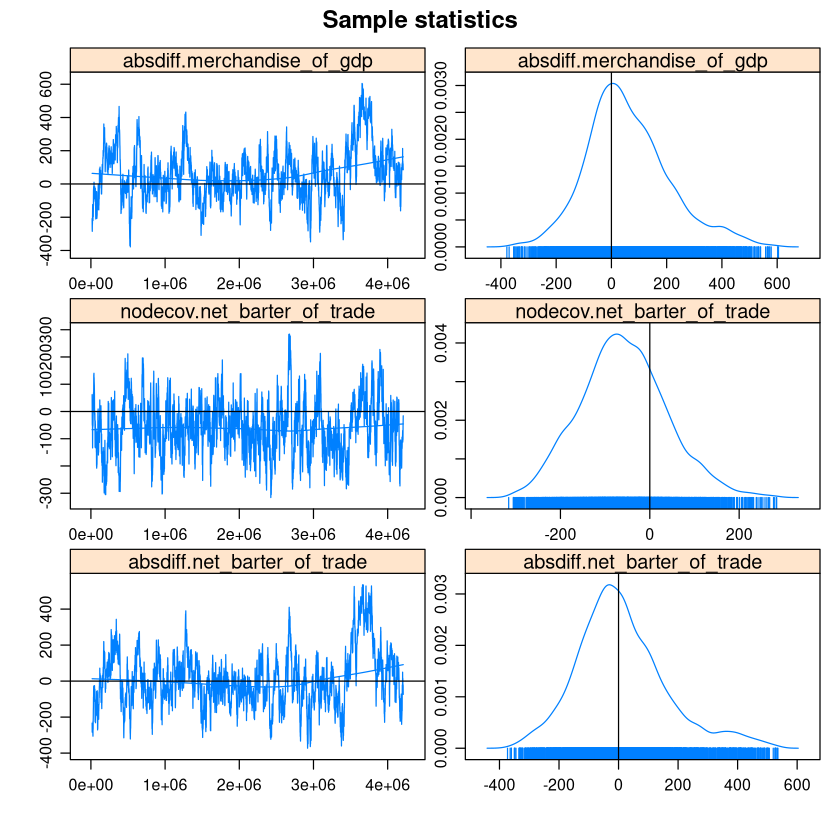


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


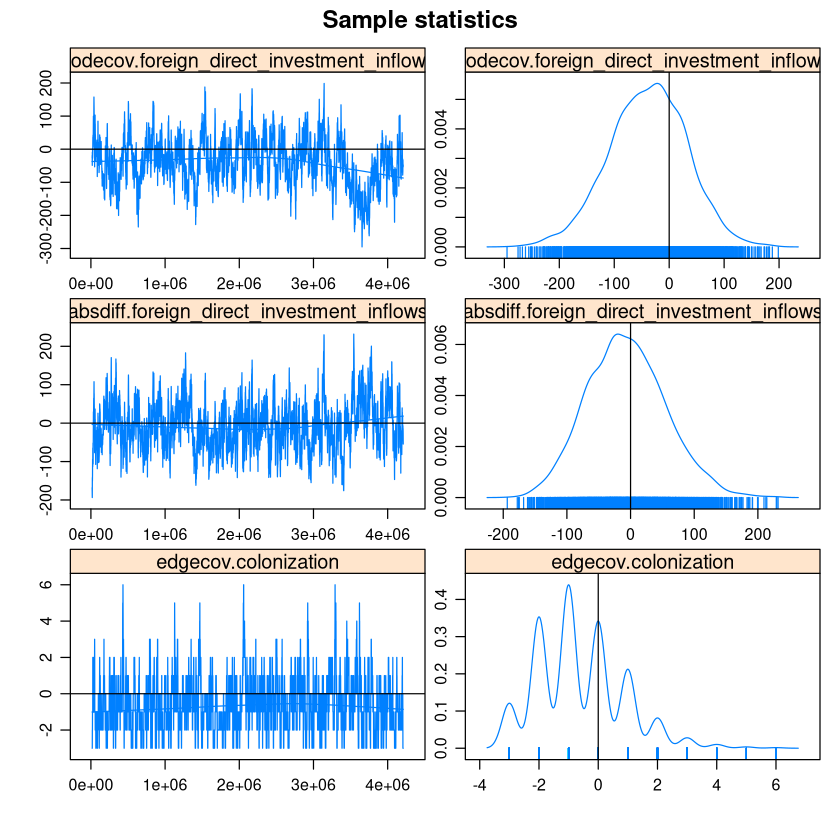

In [14]:
mcmc.diagnostics(model, which = c("plots"))

### Check correlations

In [15]:
filtered_nl = nl[, !startsWith(colnames(nl), 'scaled') & !startsWith(colnames(nl), 'log')]
nums <- unlist(lapply(filtered_nl, is.numeric))

In [16]:
cor(filtered_nl[, nums])

,area,industry_of_gdp,merchandise_of_gdp,population,landlocked,gdp_per_capita,agriculture_forestry_fishing_of_gdp,gdp_growth,gdp_us_dollar,foreign_direct_investment_inflows,inflation_rate,net_barter_of_trade
area,1.00000000,0.29203588,-0.244294785,0.82987406,0.116944454,-0.12283826,0.13515981,0.020870426,0.64358076,0.204115895,0.221510060,0.32924897
industry_of_gdp,0.29203588,1.00000000,0.206270705,0.18908329,-0.021245990,0.22648339,-0.35548748,-0.101101727,0.30628118,-0.018599463,0.063863167,0.53456520
merchandise_of_gdp,-0.24429478,0.20627070,1.000000000,-0.19857330,0.007636278,0.24292457,-0.29383846,0.050183534,-0.01902690,0.070591526,-0.034370635,-0.07114190
population,0.82987406,0.18908329,-0.198573296,1.00000000,0.031888981,-0.12006596,0.11137551,0.059214794,0.79665829,0.311686046,0.203315402,0.15986163
landlocked,0.11694445,-0.02124599,0.007636278,0.03188898,1.000000000,-0.26517180,0.25818783,0.141315363,-0.13958038,-0.113776554,0.076999834,0.04902593
gdp_per_capita,-0.12283826,0.22648339,0.242924566,-0.12006596,-0.265171796,1.00000000,-0.81321086,-0.101199446,0.49500833,0.294326378,-0.326041297,-0.05863353
agriculture_forestry_fishing_of_gdp,0.13515981,-0.35548748,-0.293838463,0.11137551,0.258187832,-0.81321086,1.00000000,0.134114532,-0.40513025,-0.194841215,0.211693694,0.02065966
gdp_growth,0.02087043,-0.10110173,0.050183534,0.05921479,0.141315363,-0.10119945,0.13411453,1.000000000,-0.01073487,0.005082295,-0.001902714,0.02543716
gdp_us_dollar,0.64358076,0.30628118,-0.019026899,0.79665829,-0.139580380,0.49500833,-0.40513025,-0.010734869,1.00000000,0.446589821,-0.026464281,0.09666205
foreign_direct_investment_inflows,0.20411590,-0.01859946,0.070591526,0.31168605,-0.113776554,0.29432638,-0.19484122,0.005082295,0.44658982,1.000000000,-0.101788350,-0.11098304


In [17]:
cor_results = cor(filtered_nl[, nums]) > .6
diag(cor_results) = F

In [18]:
col_names = colnames(cor_results)
temp = matrix('', nrow=length(col_names), ncol = length(col_names))
for (i in 1:length(col_names)) {
    for (j in 1:length(col_names)) {
        temp[i, j] = paste(col_names[i], col_names[j])
    }
}

In [19]:
temp[cor_results]

[1] "population area"          "gdp_us_dollar area"      
[3] "area population"          "gdp_us_dollar population"
[5] "area gdp_us_dollar"       "population gdp_us_dollar"